In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from jax import random
import jax.numpy as jnp
import numpyro.distributions as dist
import numpyro
import arviz as az 
from numpyro import infer 

Q1.Use NumPyro to define a model containing a single random variable that follows a Gamma distribution with shape parameters α = 5, β = 0.1. First draw samples directly from the distribution and plot the histogram and/or KDE.

In [4]:
alpha = 5
beta = 0.1

num_samples = 1000
rng_key = random.PRNGKey(0)
samples = dist.Gamma(alpha, beta).sample(rng_key, (num_samples,))

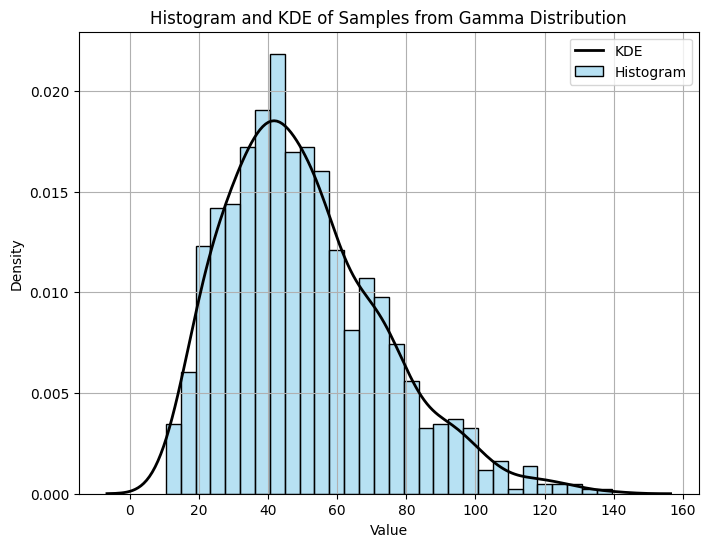

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(samples, bins=30, stat='density', color='skyblue', alpha=0.6, label='Histogram')
sns.kdeplot(samples, color='black', label='KDE', linewidth=2)

plt.title('Histogram and KDE of Samples from Gamma Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid()
plt.legend()
plt.show()

Q2.Using the samples you've drawn, compute the mean and variance of the random variable. Modify the shape parameters individually to see how each of them affect the mean and variance of the distribution.

In [11]:
rng_key = random.PRNGKey(0)
def compute_statistics(alpha, beta, num_samples=10000):
    samples = dist.Gamma(alpha, beta).sample(rng_key, (num_samples,))

    mean_samples = jnp.mean(samples)
    var_samples = jnp.var(samples)
    
    return mean_samples, var_samples

alpha = 5.0
beta = 0.1

mean, variance = compute_statistics(alpha, beta)
print(mean, variance)

50.129536 505.279


In [ ]:
rng_key = random.PRNGKey(0)
def compute_statistics(alpha, beta, num_samples=10000):
    samples = dist.Gamma(alpha, beta).sample(rng_key, (num_samples,))

    mean_samples = jnp.mean(samples)
    var_samples = jnp.var(samples)
    
    return mean_samples, var_samples

alpha = 10 #doubled this. mean and variance is doubled.
beta = 0.1

mean, variance = compute_statistics(alpha, beta)
print(mean, variance)

100.21746 1010.0222


In [ ]:
rng_key = random.PRNGKey(0)
def compute_statistics(alpha, beta, num_samples=10000):
    samples = dist.Gamma(alpha, beta).sample(rng_key, (num_samples,))

    mean_samples = jnp.mean(samples)
    var_samples = jnp.var(samples)
    
    return mean_samples, var_samples

alpha = 2.5 #half the alpha, half the mean and variance 
beta = 0.1

mean, variance = compute_statistics(alpha, beta)
print(mean, variance)

25.104382 252.6608


In [13]:
rng_key = random.PRNGKey(0)
def compute_statistics(alpha, beta, num_samples=10000):
    samples = dist.Gamma(alpha, beta).sample(rng_key, (num_samples,))

    mean_samples = jnp.mean(samples)
    var_samples = jnp.var(samples)
    
    return mean_samples, var_samples

alpha = 5.0
beta = 0.2

mean, variance = compute_statistics(alpha, beta)
print(mean, variance)

25.064768 126.31975


In [ ]:
rng_key = random.PRNGKey(0)
def compute_statistics(alpha, beta, num_samples=10000):
    samples = dist.Gamma(alpha, beta).sample(rng_key, (num_samples,))

    mean_samples = jnp.mean(samples)
    var_samples = jnp.var(samples)
    
    return mean_samples, var_samples

alpha = 5.0
beta = 0.05 #changing beta made mean and variance 3 times or 4 more if we increase beta and less if we decrease beta

mean, variance = compute_statistics(alpha, beta)
print(mean, variance)

100.25907 2021.116


# Generate synthetic data with outliers
def generate_data(n=100, outliers=5, noise=0.5):
    rng_key = random.PRNGKey(0)
    x = jnp.linspace(0, 10, n)
    y = 2.0 * x + 1.0 + noise * random.normal(rng_key, (n,))
    y = y.at[random.randint(rng_key, (outliers,), 0, n)].set(y[random.randint(rng_key, (outliers,), 0, n)] + 20)  # Add outliers
    return x, y

x_data, y_data = generate_data()

# Define the linear regression model
def model(x, y=None):
    # Priors
    alpha = numpyro.sample("alpha", dist.Normal(0, 10))
    beta = numpyro.sample("beta", dist.Normal(0, 10))
    
    # Standard deviation parameter with Gamma prior
    sigma = numpyro.sample("sigma", dist.Gamma(2, 0.1))  # Shape=2, Rate=0.1

    # Likelihood
    mu = alpha + beta * x
    numpyro.sample("obs", dist.Normal(mu, sigma), obs=y)

# Run MCMC
num_samples = 500
num_warmup = 500

rng_key = random.PRNGKey(0)
kernel = infer.NUTS(model)
mcmc = infer.MCMC(kernel, num_warmup=num_warmup, num_samples=num_samples)
mcmc.run(rng_key, x=x_data, y=y_data)

# Get samples
samples = mcmc.get_samples()

# Plot the results
plt.figure(figsize=(10, 6))
sns.histplot(samples['sigma'], kde=True, stat='density', color='skyblue', label='Posterior Sigma')
plt.title('Posterior Distribution of Sigma with Gamma Prior')
plt.xlabel('Sigma')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Summary of posterior distributions
mcmc.print_summary()
